In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [56]:
elasticity = pd.read_csv("./output/new-elasticity.csv")

In [77]:
elasticity.head()

,θE,θI,θ,ωij,ωii,shocks,assets,trade
0,-10.911024,-1.000000,-10.911024,0.000051,0.004063,1.0,-0.500000,0.012590
1,-10.142178,-1.000000,-10.142178,0.000057,0.002861,1.0,-0.457286,0.020018
2,-9.545816,-1.004528,-9.550343,0.000061,0.002061,1.0,-0.414573,0.029565
3,-9.022220,-1.005171,-9.027391,0.000038,0.000618,1.0,-0.371859,0.061535
4,-8.577752,-1.006071,-8.583823,0.000051,0.000454,1.0,-0.329146,0.112092


In [58]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

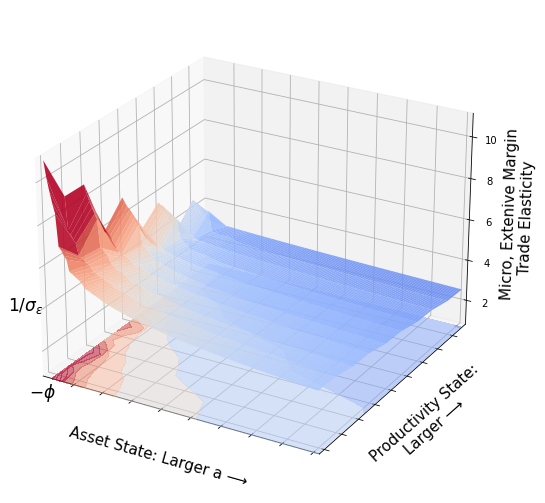

In [65]:
topasset = 4.0

foo = elasticity[elasticity.assets < topasset]

var = "θE"

x, y, z = create_grid(foo,"assets","shocks",var)

fig = plt.figure(figsize = [15.0,9.0])

ax = fig.add_subplot(projection='3d')

factor = 0.65
vmax = -foo[var].min()*factor
vmin = -foo[var].max()*factor

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin= vmin , vmax=vmax),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .5

ax.contourf(x, y, -1*z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-.45,topasset)
ax.set_xticklabels([])

ax.set_ylim(0.9,9.7)
ax.set_yticklabels([])

ax.set_zlim(1.0)

ax.text(-.65, 0.25, 0, "$-\phi$", fontsize = 17)

ax.text(-0.95, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State:\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro, Extenive Margin\n Trade Elasticity ", fontsize = 15)

#plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight")
#plt.savefig("../notes/figures/micro-elasticity.png")

plt.show()

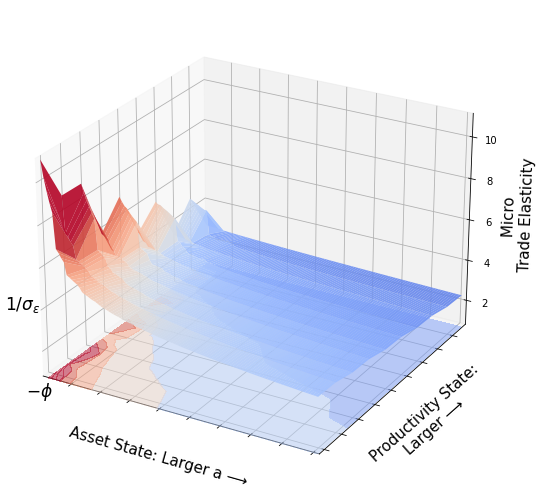

In [67]:
foo = elasticity[elasticity.assets < topasset]

var = "θ"

x, y, z = create_grid(foo,"assets","shocks",var)

fig = plt.figure(figsize = [15.0,9.0])

ax = fig.add_subplot(projection='3d')

factor = 0.65
vmax = -foo[var].min()*factor
vmin = -foo[var].max()*factor

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin= vmin , vmax=vmax),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .5

ax.contourf(x, y, -1*z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-.4,topasset)
ax.set_xticklabels([])

ax.set_ylim(0.9,9.7)
ax.set_yticklabels([])

ax.set_zlim(1.0)

ax.text(-.65, 0.25, 0, "$-\phi$", fontsize = 17)

ax.text(-0.95, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State:\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro \n Trade Elasticity", fontsize = 15)

#plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight")
#plt.savefig("../notes/figures/micro-elasticity.png")

plt.show()

C:\Users\irmew01\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


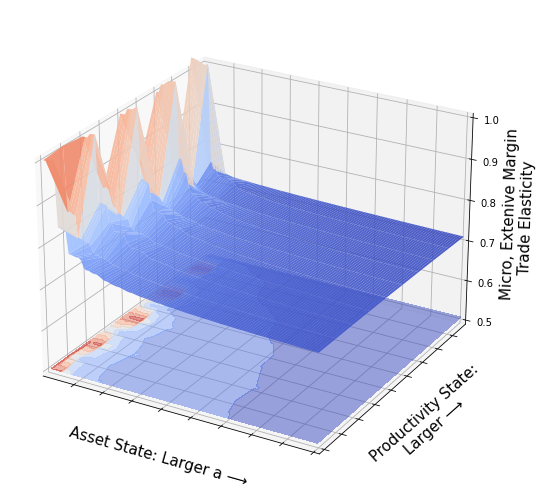

In [68]:
foo = elasticity[elasticity.assets < topasset]

x, y, z = create_grid(foo,"assets","shocks","θI")

fig = plt.figure(figsize = [15.0,9.0], tight_layout = True)

ax = fig.add_subplot(projection='3d')

factor = 1.0
vmax = -foo["θI"].min()*factor
vmin = -foo["θI"].max()*factor

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin= vmin , vmax=vmax),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .5

ax.contourf(x, y, -1*z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-.45,topasset)
ax.set_xticklabels([])

ax.set_ylim(0.9,9.7)
ax.set_yticklabels([])

ax.set_zlim(0.50, 1.0)

ax.text(-.5, 0.25, 0, "$-\phi$", fontsize = 17)

ax.text(-0.95, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State:\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro, Extenive Margin\n Trade Elasticity ", fontsize = 15)

#plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight")
#plt.savefig("../notes/figures/micro-elasticity.png")

plt.show()

C:\Users\irmew01\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


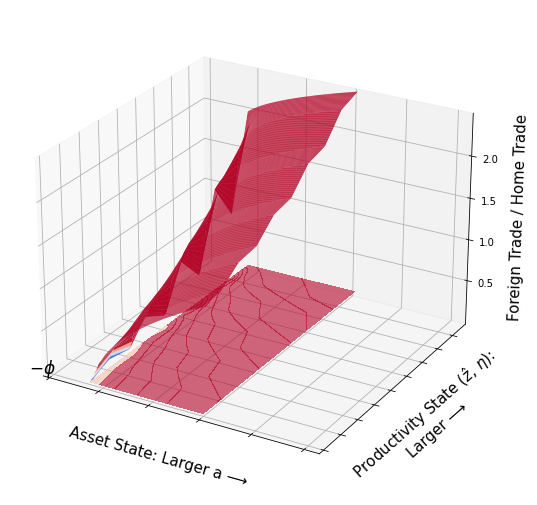

In [75]:
foo = elasticity[elasticity.assets < topasset]

x, y, z = create_grid(foo,"assets","shocks","trade")

fig = plt.figure(figsize = [15.0,9.0], tight_layout = True)

#ax = fig.gca(projection='3d')



ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0.08, vmax=0.20),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.005

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=0.20), 
                  alpha = 0.60, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.35)
ax.set_xticklabels([])

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.text(-2.75, 0.65, -.03, "$-\phi$", fontsize = 17)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Foreign Trade / Home Trade ", fontsize = 15)

#plt.savefig("../notes/figures/trade-share.pdf", bbox_inches = "tight")

plt.show()

In [76]:
foo

,θE,θI,θ,ωij,ωii,shocks,assets,trade
0,-10.911024,-1.000000,-10.911024,0.000051,0.004063,1.0,-0.500000,0.012590
1,-10.142178,-1.000000,-10.142178,0.000057,0.002861,1.0,-0.457286,0.020018
2,-9.545816,-1.004528,-9.550343,0.000061,0.002061,1.0,-0.414573,0.029565
3,-9.022220,-1.005171,-9.027391,0.000038,0.000618,1.0,-0.371859,0.061535
4,-8.577752,-1.006071,-8.583823,0.000051,0.000454,1.0,-0.329146,0.112092
...,...,...,...,...,...,...,...,...
1901,-2.403682,-0.703590,-2.107272,0.000375,0.000154,10.0,3.814070,2.437461
1902,-2.401404,-0.703520,-2.104925,0.000365,0.000150,10.0,3.856784,2.441014
1903,-2.399136,-0.703451,-2.102587,0.000349,0.000143,10.0,3.899497,2.444555
1904,-2.396861,-0.703376,-2.100237,0.000344,0.000141,10.0,3.942211,2.448084
